In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/meetHariyani/Healthcare/main/healthcare_diabetes_dataset.csv",sep=",")

WEEK **1** 

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Trating missing values

In [6]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for column in columns:
  df[column] = df[column].replace(0,np.NaN)
  mean = int(df[column].mean(skipna=True))
  df[column] = df[column].replace(np.NaN,mean)

Replaced null values with mean of the perticular data.

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682292,72.386719,29.108073,155.28125,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.435999,12.096642,8.791221,85.02155,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.00000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.50000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,155.00000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.00000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.00000,67.100000,2.420000,81.000000,1.000000


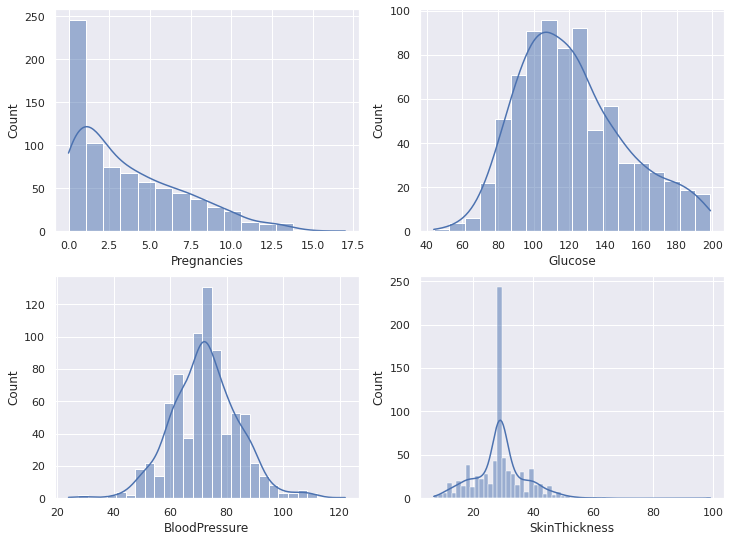

In [10]:

sns.set(style="darkgrid")
sns.set_hls_values(color="skyblue")

fig, axs = plt.subplots(2, 2, figsize=(12, 9),)

sns.histplot(data=df, x="Pregnancies", kde=True, ax=axs[0, 0])
sns.histplot(data=df, x="Glucose", kde=True, ax=axs[0, 1])
sns.histplot(data=df, x="BloodPressure", kde=True,  ax=axs[1, 0])
sns.histplot(data=df, x="SkinThickness", kde=True, ax=axs[1, 1])

plt.show()

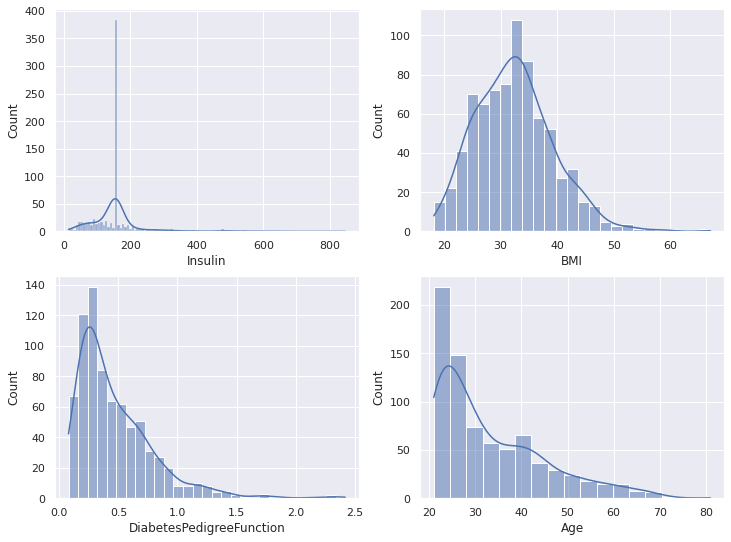

In [11]:
sns.set(style="darkgrid")
sns.set_hls_values(color="skyblue")

fig, axs = plt.subplots(2, 2, figsize=(12, 9))

sns.histplot(data=df, x="Insulin", kde=True, ax=axs[0, 0])
sns.histplot(data=df, x="BMI", kde=True, ax=axs[0, 1])
sns.histplot(data=df, x="DiabetesPedigreeFunction", kde=True, ax=axs[1, 0])
sns.histplot(data=df, x="Age", kde=True, ax=axs[1, 1])

plt.show()

Create a count (frequency) plot describing the data types and the count of variables

In [13]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


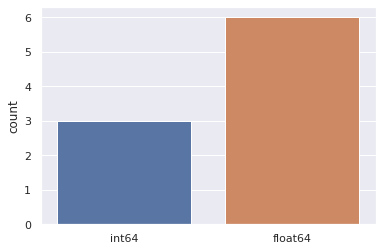

In [14]:
sns.countplot(df.dtypes.map(str))
plt.show()

WEEK **2**

Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

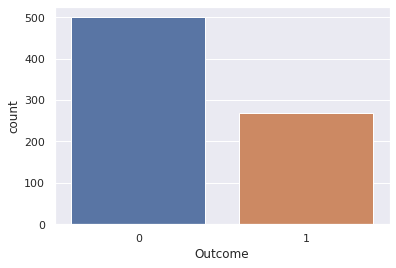

In [16]:
sns.countplot(x="Outcome", data=df)

Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

Text(0.5, 1.0, 'scatter plot between variables')

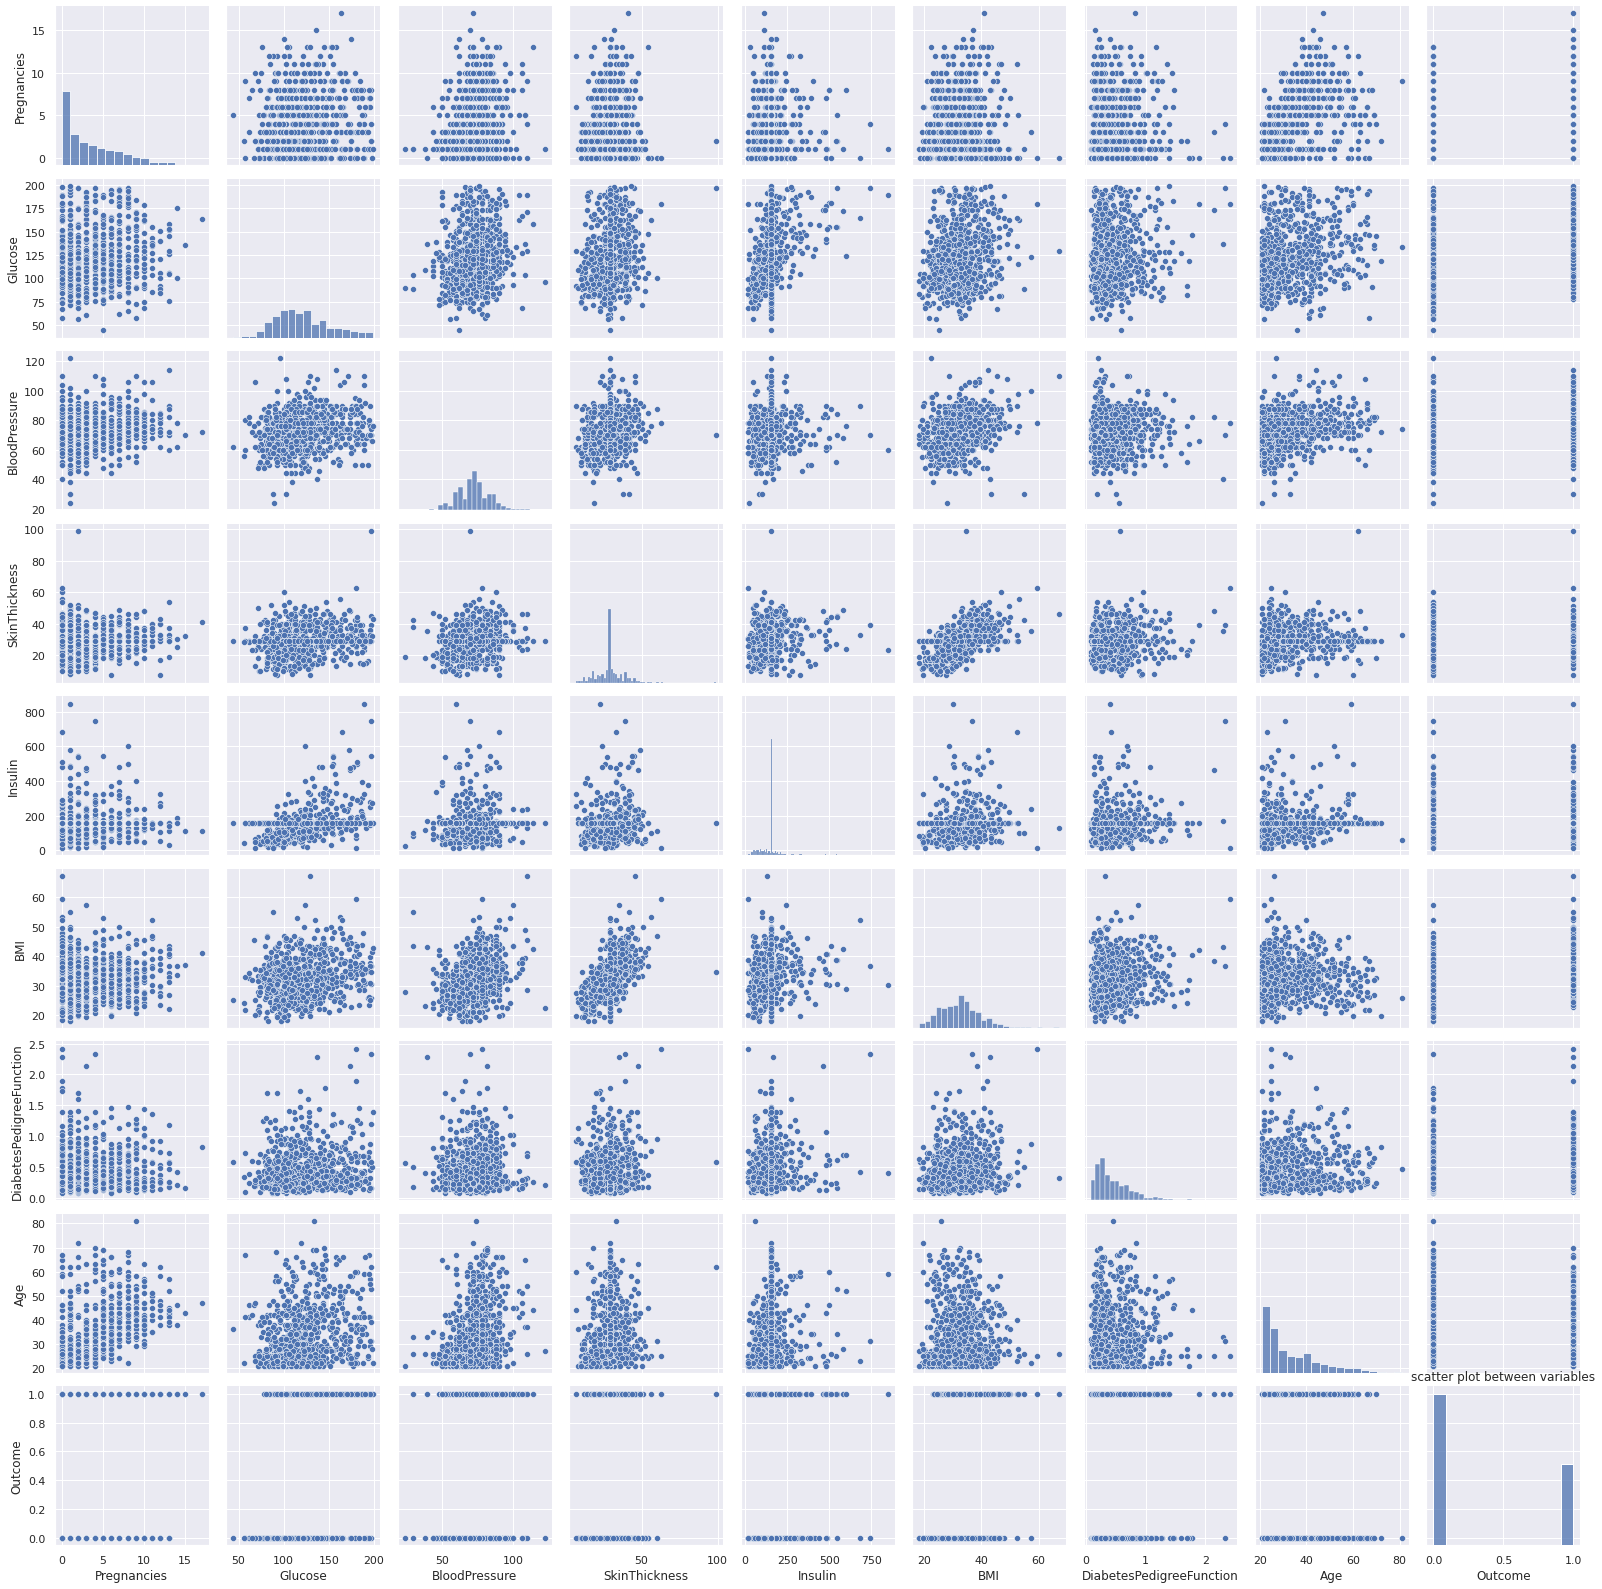

In [18]:
sns.pairplot(df)
plt.title('scatter plot between variables')

Perform correlation analysis. Visually explore it using a heat map.

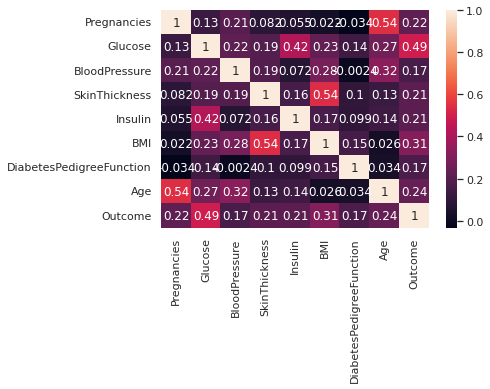

In [19]:
sns.heatmap(df.corr(),annot=True)

## WEEK 3

Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [37]:
# classifying features and lables from the data
X=df.drop(labels='Outcome', axis=1)
y=df.Outcome

In [35]:
#Splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state =123)

## KNN

In [38]:
knn = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p = 2)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [39]:
# classification_report
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       143
           1       0.73      0.62      0.67        88

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



Confusion matrix for KNN algorithm


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


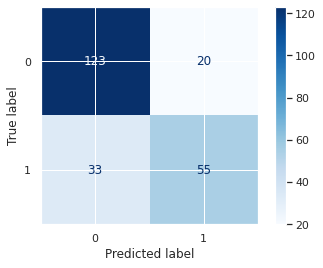

In [40]:
print('Confusion matrix for KNN algorithm')
disp = plot_confusion_matrix(knn, X_test, y_test, cmap='Blues')

## Support Vector Classifier

In [41]:
svc = SVC(kernel='rbf',gamma='auto')
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)

In [42]:
# classification_report
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       143
           1       0.00      0.00      0.00        88

    accuracy                           0.62       231
   macro avg       0.31      0.50      0.38       231
weighted avg       0.38      0.62      0.47       231



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix for Support Vector Classifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


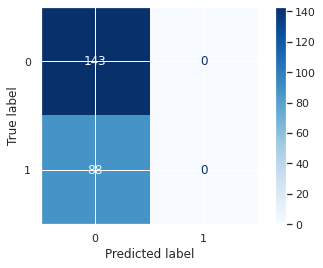

In [43]:
print('Confusion matrix for Support Vector Classifier')
disp = plot_confusion_matrix(svc, X_test, y_test, cmap='Blues')

## Random Forest

In [44]:
rf = RandomForestClassifier(n_estimators=11)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [45]:
# classification_report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       143
           1       0.68      0.66      0.67        88

    accuracy                           0.75       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.75      0.75      0.75       231



Confusion matrix for Random Forest


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


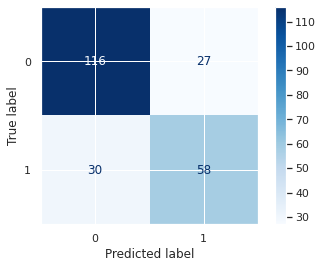

In [46]:
print('Confusion matrix for Random Forest')
disp = plot_confusion_matrix(rf, X_test, y_test, cmap='Blues')

## Decision Tree Classifier

In [48]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

In [49]:
# classification_report
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       143
           1       0.64      0.64      0.64        88

    accuracy                           0.73       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.73      0.73      0.73       231



Confusion matrix for Decision Tree


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


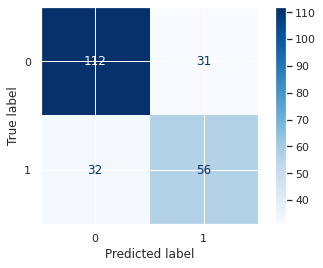

In [50]:
print('Confusion matrix for Decision Tree')
disp = plot_confusion_matrix(dt, X_test, y_test, cmap='Blues')

## Logistic Regression

In [51]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [52]:
pred = lr.predict(X_test)

In [53]:
# classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.83       143
           1       0.75      0.60      0.67        88

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.76       231



Confusion matrix for Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


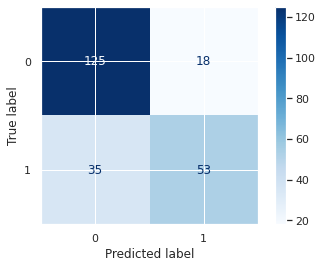

In [54]:
print('Confusion matrix for Logistic Regression')
disp = plot_confusion_matrix(lr, X_test, y_test, cmap='Blues')

## WEEK 4

Create a classification report by analyzing sensitivity, specificity, AUC(ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

In [55]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Precision Recall Curve for Logistic Regression

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

KNN

AUC: 0.838


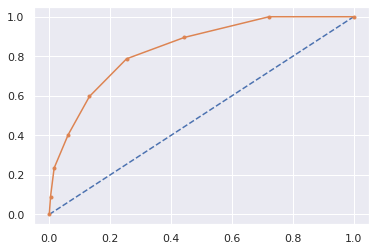

In [56]:
# predict probabilities
probs = knn.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the knn
plt.plot(fpr, tpr, marker='.')

Logistic Regression

AUC: 0.832


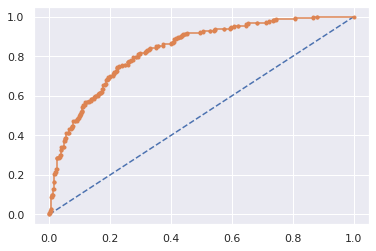

In [57]:
# predict probabilities
probs = lr.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the lr
plt.plot(fpr, tpr, marker='.')

Decision Tree Classifier



AUC: 0.849


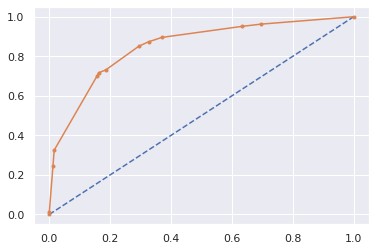

In [58]:
# predict probabilities
probs = dt.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the dt
plt.plot(fpr, tpr, marker='.')

Random Forest

AUC: 0.968


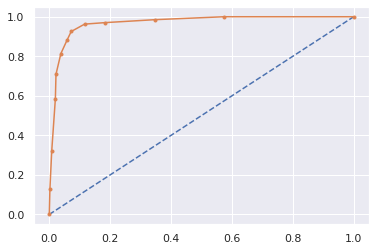

In [59]:
# predict probabilities
probs = rf.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the rf
plt.plot(fpr, tpr, marker='.')